<a href="https://colab.research.google.com/github/OctavaOrigin/Deep-Learning/blob/main/NLP_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install gdown

In [ ]:
import gdown

gdown.download(f'https://drive.google.com/uc?id=1OelGGXPXBinXvZnDb1Bmmxe4rtdBmqdk', 'banki_responses.json.bz2', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1OelGGXPXBinXvZnDb1Bmmxe4rtdBmqdk
To: /content/banki_responses.json.bz2
100%|██████████| 108M/108M [00:01<00:00, 65.5MB/s]


'banki_responses.json.bz2'

In [ ]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:56, 3576.62it/s]


In [ ]:
responses[99]

{'city': 'г. Саратов',
 'rating_not_checked': False,
 'title': 'Карта ко вкладу',
 'num_comments': 0,
 'bank_license': 'лицензия № 880',
 'author': 'ronnichka',
 'bank_name': 'Югра',
 'datetime': '2015-06-03 20:56:57',
 'text': 'Здравствуйте! Хотела написать, что мне месяц не выдают карту ко вкладу, ссылаясь на "нам же их из Самары везут" (на секундочку 5 часов езды от нашего города). Но! Прочитала, что людям 3,5 месяцев не выдают карту, и поняла, что у меня все хорошо, пока что. И подарок мне дали, и кулер в отделении есть. Так что я, конечно, готова ждать. Правда хотелось бы не очень долго.',
 'rating_grade': 3}

In [ ]:
df = pd.DataFrame(responses)

In [ ]:
df["city"] = df["city"].str.replace("г.", "").str.strip()

<ipython-input-8-95ec5c3d8ed2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["city"] = df["city"].str.replace("г.", "").str.strip()


In [ ]:
df["city"] = df["city"].str.replace(r'\([^)]*\)', '').str.strip()

<ipython-input-9-3f8ef0de6559>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["city"] = df["city"].str.replace(r'\([^)]*\)', '').str.strip()


In [ ]:
df["city"] = df["city"].str.replace("(", "").str.strip()
df["city"] = df["city"].str.replace(")", "").str.strip()

<ipython-input-10-ef6e66a5d68a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["city"] = df["city"].str.replace("(", "").str.strip()
<ipython-input-10-ef6e66a5d68a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["city"] = df["city"].str.replace(")", "").str.strip()


In [ ]:
df.groupby(['city'])['bank_name'].count().reset_index().sort_values(by = ['bank_name'], ascending=False)

,city,bank_name
1875,Москва,55547
3077,Санкт-Петербург,14361
892,Екатеринбург,2341
2391,Новосибирск,2311
2300,Нижний Новрод,1989
...,...,...
1951,"Москва, ДО Дубровка",1
1952,"Москва, ДО Кутузовский",1
1953,"Москва, ДО Отрадное",1
1954,"Москва, Даниловское",1


In [ ]:
df.groupby(['bank_name'])['city'].count().reset_index().sort_values(by = ['city'], ascending=False)

,bank_name,city
502,Сбербанк России,25521
34,Альфа-Банк,9059
625,Хоум Кредит Банк,7337
106,ВТБ 24,7307
482,Русский Стандарт,7194
...,...,...
377,Нэклис-Банк,0
209,ИРС,0
104,ВИП-Банк,0
537,Соцкредитбанк,0


In [ ]:
df['text_len'] = df['text'].str.len()

In [ ]:
below_ten_thousand = df[df['text_len'] < 10000]['text_len']

(array([ 135.,  615., 3068., 7501., 7879., 9006., 9198., 8823., 8923.,
        8366., 7820., 7333., 6766., 6174., 5517., 5020., 4660., 4189.,
        3681., 3452., 3028., 2678., 2504., 2287., 2069., 1827., 1640.,
        1573., 1387., 1247., 1099., 1079.,  906.,  882.,  829.,  720.,
         693.,  632.,  566.,  546.,  496.,  447.,  387.,  357.,  343.,
         298.,  329.,  298.,  280.,  219.,  219.,  207.,  180.,  165.,
         170.,  180.,  130.,  127.,  123.,  115.,  105.,  113.,  103.,
          94.,   79.,   74.,   69.,   64.,   64.,   66.,   58.,   54.,
          65.,   63.,   51.,   42.,   50.,   40.,   35.,   36.,   35.,
          31.,   28.,   30.,   29.,   29.,   26.,   28.,   21.,   22.,
          21.,   21.,   15.,   15.,   20.,   16.,   19.,   12.,   15.,
          23.]),
 array([  23.  ,  122.73,  222.46,  322.19,  421.92,  521.65,  621.38,
         721.11,  820.84,  920.57, 1020.3 , 1120.03, 1219.76, 1319.49,
        1419.22, 1518.95, 1618.68, 1718.41, 1818.14, 1917.87

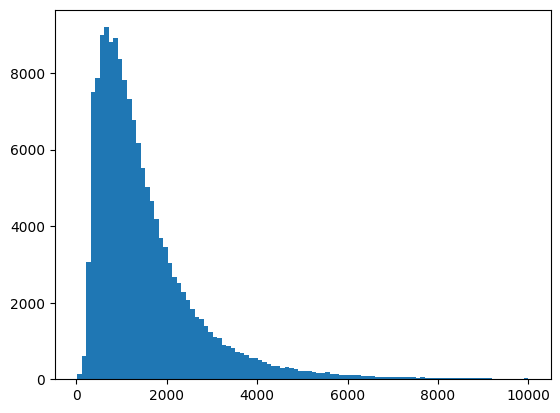

In [ ]:
plt.hist(below_ten_thousand, bins=100)

In [ ]:
df['words_amount'] = df['text'].str.split(' ').apply(len)

(array([5.0900e+03, 2.6918e+04, 2.8606e+04, 2.4064e+04, 1.8066e+04,
        1.3164e+04, 9.5620e+03, 6.8600e+03, 4.9610e+03, 3.5790e+03,
        2.7780e+03, 2.0520e+03, 1.5870e+03, 1.2110e+03, 9.5000e+02,
        7.1400e+02, 5.9200e+02, 4.8200e+02, 3.7100e+02, 2.8200e+02,
        2.4900e+02, 2.1400e+02, 1.4500e+02, 1.3500e+02, 1.3000e+02,
        1.1200e+02, 8.7000e+01, 7.0000e+01, 6.8000e+01, 5.0000e+01,
        3.8000e+01, 4.2000e+01, 2.8000e+01, 2.5000e+01, 3.0000e+01,
        1.8000e+01, 2.1000e+01, 2.4000e+01, 7.0000e+00, 1.2000e+01,
        1.3000e+01, 1.2000e+01, 6.0000e+00, 9.0000e+00, 3.0000e+00,
        6.0000e+00, 4.0000e+00, 7.0000e+00, 7.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        3.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

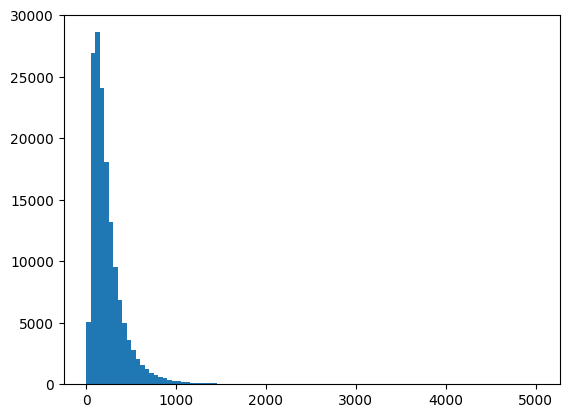

In [ ]:
plt.hist(df['words_amount'], bins=100)

In [ ]:
df = df.loc[df['text'].str.len() < 10000]

In [ ]:
df = df.sample(n=1000, random_state=42, replace=False)

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download ru_core_news_sm

In [ ]:
import spacy

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
import re
ru_words = re.compile("[А-Яа-я]+")

In [ ]:
text = df['text'].str.cat(sep=' ')

In [ ]:
text = ' '.join(ru_words.findall(text))

In [ ]:
nlp.max_length = 2000000
doc = nlp(text)
text_lemma = ' '.join([token.lemma_ for token in doc])

In [ ]:
from collections import Counter

In [ ]:
words = text.split()
word_freq = Counter(words)

Частота слов

In [ ]:
pd.DataFrame(word_freq.most_common()[:10], columns=['word', 'freq'])

,word,freq
0,в,7568
1,и,6381
2,не,5380
3,что,4194
4,на,4193
5,я,3005
6,с,2788
7,по,2173
8,мне,2023
9,банка,1544


Частота лемм

In [ ]:
words = text_lemma.split()
word_freq = Counter(words)
pd.DataFrame(word_freq.most_common()[:10], columns=['word', 'freq'])

,word,freq
0,в,8828
1,и,6873
2,не,5614
3,на,4653
4,что,4595
5,банк,4271
6,я,3907
7,с,2990
8,по,2339
9,карта,2293


Отфильтрованные слова

In [ ]:
filtered_text = ' '.join([token.text for token in doc if not token.is_stop])
filtered_text = filtered_text.split(' ')
filtered_text = Counter(filtered_text)
pd.DataFrame(filtered_text.most_common()[:10], columns=['word', 'freq'])

,word,freq
0,банка,1544
1,банк,1129
2,деньги,887
3,карту,733
4,карты,691
5,т,522
6,раз,485
7,кредит,477
8,день,474
9,заявление,472


Только существительные

In [ ]:
noun_text = ' '.join([token.lemma_ for token in doc if token.pos_ == 'NOUN'])
noun_text = noun_text.split(' ')
noun_text = Counter(noun_text)
pd.DataFrame(noun_text.most_common()[:10], columns=['word', 'freq'])

,word,freq
0,банк,3642
1,карта,2253
2,деньга,1262
3,день,1131
4,отделение,912
5,кредит,895
6,сотрудник,882
7,клиент,827
8,заявление,754
9,счёт,733


Text(0.5, 1.0, 'Кривая Хипса')

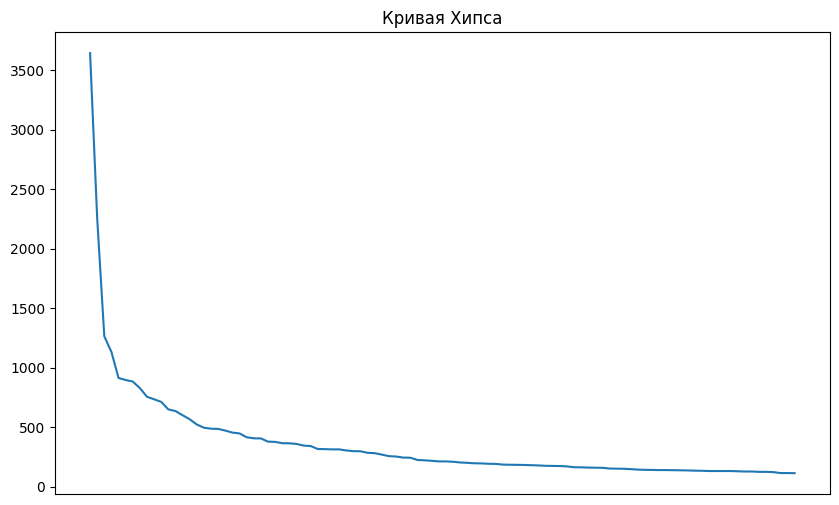

In [ ]:
graph = pd.DataFrame(noun_text.most_common()[:100], columns=['word', 'freq'])
plt.figure(figsize=(10,6))
plt.plot(graph.word, graph.freq)
plt.xticks([])
plt.title('Кривая Хипса')

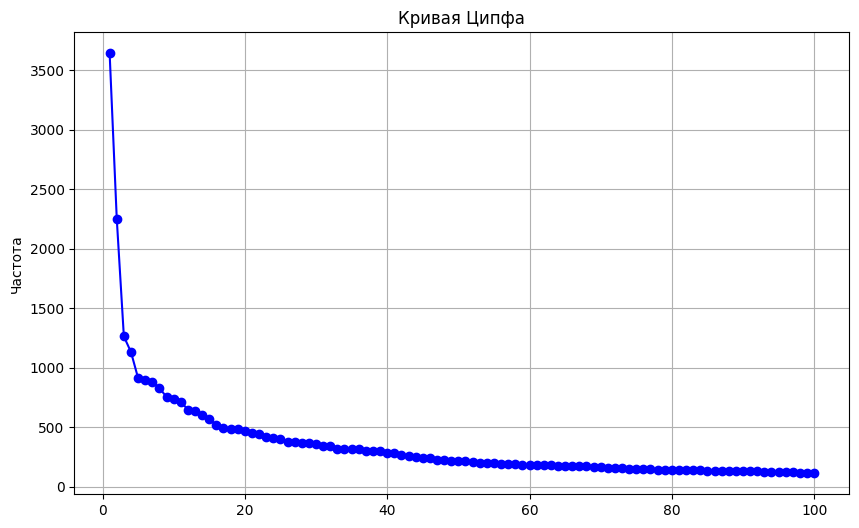

In [ ]:
graph = graph.sort_values(by='freq', ascending=False)

graph['rank'] = range(1, len(graph) + 1)

plt.figure(figsize=(10, 6))
plt.plot(graph['rank'], graph['freq'], marker='o', linestyle='-', color='b')
plt.ylabel('Частота')
plt.title('Кривая Ципфа')
plt.grid(True)


In [ ]:
d = pd.DataFrame(noun_text.items(), columns=['word', 'freq'])
d.loc[(d['word'] == 'клиент') | (d['word'] == 'сотрудник')]

,word,freq
73,клиент,827
87,сотрудник,882


In [ ]:
d.loc[(d['word'] == 'мошенничество') | (d['word'] == 'доверие')]

,word,freq
774,доверие,16
1045,мошенничество,31


In [ ]:
df = pd.DataFrame(responses)

In [ ]:
df = df.loc[df['rating_grade'] == 1.0]

In [ ]:
def lemmatization(text):
  doc = nlp(text)
  return [token.lemma_ for token in doc if not token.is_stop]

In [ ]:
def join_them(text):
  return ' '.join(text)

In [ ]:
def only_words(text):
  return ' '.join(ru_words.findall(text))

In [ ]:
df = df.sample(n=1000, random_state=42, replace=False)

In [ ]:
df['text'] = df['text'].apply(lemmatization)

In [ ]:
df['text'] = df['text'].apply(join_them)

In [ ]:
df['text'] = df['text'].apply(only_words)

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd

texts = [text.split() for text in df['text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
num_topics_list = [5, 10, 15]

lda_models = []
for num_topics in num_topics_list:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    lda_models.append(lda_model)

for i, num_topics in enumerate(num_topics_list):
    print(f"Модель с {num_topics} темами:")
    for topic_id in range(num_topics):
        print(f"Тема {topic_id}: {lda_models[i].print_topic(topic_id)}")

Модель с 5 темами:
Тема 0: 0.040*"банк" + 0.011*"карта" + 0.009*"т" + 0.009*"кредит" + 0.009*"сотрудник" + 0.009*"отделение" + 0.008*"деньга" + 0.008*"сказать" + 0.007*"день" + 0.006*"сч"
Тема 1: 0.035*"банк" + 0.013*"т" + 0.010*"деньга" + 0.009*"кредит" + 0.009*"карта" + 0.008*"день" + 0.008*"сч" + 0.007*"сотрудник" + 0.006*"заявление" + 0.006*"отделение"
Тема 2: 0.019*"банк" + 0.013*"т" + 0.013*"карта" + 0.011*"сч" + 0.010*"деньга" + 0.009*"отделение" + 0.009*"день" + 0.008*"сказать" + 0.007*"кредит" + 0.007*"сотрудник"
Тема 3: 0.025*"банк" + 0.017*"карта" + 0.010*"т" + 0.009*"клиент" + 0.009*"сотрудник" + 0.008*"отделение" + 0.008*"день" + 0.008*"деньга" + 0.007*"год" + 0.007*"сказать"
Тема 4: 0.027*"карта" + 0.016*"банк" + 0.014*"т" + 0.010*"день" + 0.008*"деньга" + 0.007*"заявление" + 0.007*"кредит" + 0.007*"сч" + 0.006*"отделение" + 0.006*"сотрудник"
Модель с 10 темами:
Тема 0: 0.029*"банк" + 0.010*"т" + 0.009*"клиент" + 0.009*"кредит" + 0.008*"сотрудник" + 0.008*"ж" + 0.008*"пла

In [ ]:
df = pd.DataFrame(responses)

In [ ]:
df = df.loc[(df['rating_grade'] == 1.0) | (df['rating_grade'] == 5.0)]

In [ ]:
def lemmatization(text):
  doc = nlp(text)
  return [token.lemma_ for token in doc if not token.is_stop]

In [ ]:
def join_them(text):
  return ' '.join(text)

In [ ]:
def only_words(text):
  return ' '.join(ru_words.findall(text))

In [ ]:
df = df.sample(n=1000, random_state=42, replace=False)

In [ ]:
df['text'] = df['text'].apply(lemmatization)

In [ ]:
df['text'] = df['text'].apply(join_them)

In [ ]:
df['text'] = df['text'].apply(only_words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

svd = TruncatedSVD(n_components=100)
reduced_features = svd.fit_transform(tfidf_matrix)

X_train, X_test, y_train, y_test = train_test_split(reduced_features, df['rating_grade'], test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.2f}")

Accuracy: 0.85
F1-score: 0.91


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vectorizer = CountVectorizer(max_features=1000)  # Используем CountVectorizer вместо TF-IDF
count_matrix = count_vectorizer.fit_transform(df['text'])

lda = LatentDirichletAllocation(n_components=100, random_state=42)
lda_features = lda.fit_transform(count_matrix)

X_train, X_test, y_train, y_test = train_test_split(lda_features, df['rating_grade'], test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1-score: {f1:.2f}")


Accuracy: 0.77
F1-score: 0.87
